In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, spearmanr, kendalltau
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Cargar los datos
df_var1 = pd.read_csv('competenciasDocentesTotal-04-10-10.csv', sep=';')
df_var2 = pd.read_csv('metodologiaActivaTotal-01-10-10.csv', sep=';')

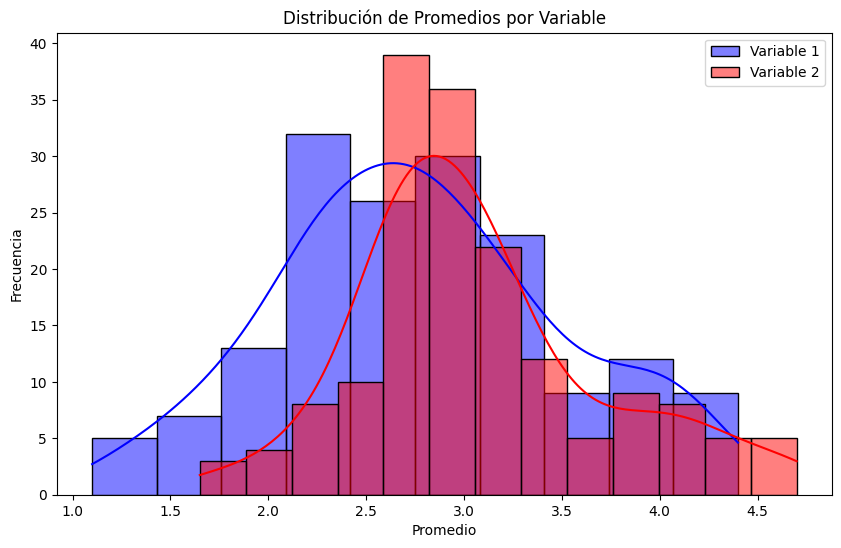

Promedio Variable 1: 2.77
Promedio Variable 2: 3.07

Estadísticas por dimensión - Variable 1:
          Dim1      Dim2      Dim3
mean  2.464716  2.901893  2.980924
std   0.757022  0.943140  0.815344

Estadísticas por dimensión - Variable 2:
          Dim1      Dim2      Dim3
mean  2.962995  2.771945  3.532129
std   0.695943  0.802898  0.859472


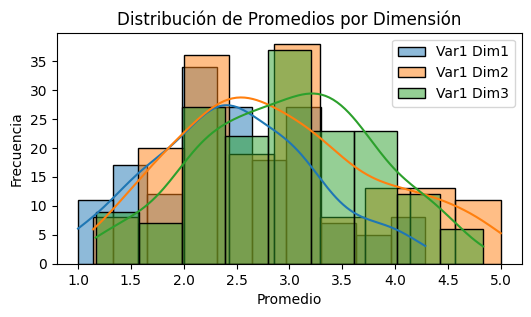

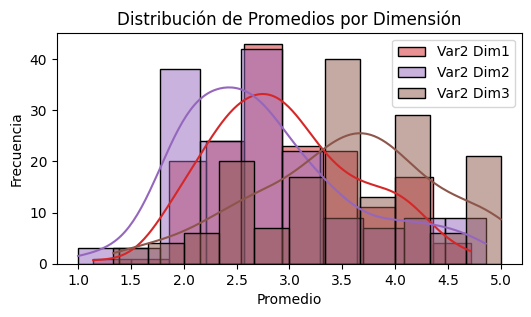

In [11]:
# Función para convertir a numérico y manejar errores
def to_numeric_safe(series):
    return pd.to_numeric(series, errors='coerce')
# Convertir todas las columnas a numéricas
df_var1 = df_var1.apply(to_numeric_safe)
df_var2 = df_var2.apply(to_numeric_safe)

# 1. Análisis descriptivo

# Calcular promedios por variable
promedio_var1 = df_var1.mean().mean()
promedio_var2 = df_var2.mean().mean()

# Crear histograma con densidad
plt.figure(figsize=(10, 6))
sns.histplot(df_var1.mean(axis=1).dropna(), kde=True, color='blue', alpha=0.5, label='Variable 1')
sns.histplot(df_var2.mean(axis=1).dropna(), kde=True, color='red', alpha=0.5, label='Variable 2')
plt.title('Distribución de Promedios por Variable')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

print(f"Promedio Variable 1: {promedio_var1:.2f}")
print(f"Promedio Variable 2: {promedio_var2:.2f}")

# 2. Análisis del promedio por dimensión

# Función para calcular promedios por dimensión
def calcular_promedios_dimension(df):
    dim1 = df.iloc[:, :7].mean(axis=1)
    dim2 = df.iloc[:, 7:14].mean(axis=1)
    dim3 = df.iloc[:, 14:].mean(axis=1)
    return pd.DataFrame({'Dim1': dim1, 'Dim2': dim2, 'Dim3': dim3})

promedios_dim_var1 = calcular_promedios_dimension(df_var1)
promedios_dim_var2 = calcular_promedios_dimension(df_var2)

# Calcular media y desviación estándar por dimensión
stats_dim_var1 = promedios_dim_var1.agg(['mean', 'std'])
stats_dim_var2 = promedios_dim_var2.agg(['mean', 'std'])

print("\nEstadísticas por dimensión - Variable 1:")
print(stats_dim_var1)
print("\nEstadísticas por dimensión - Variable 2:")
print(stats_dim_var2)

# Histograma y densidad por dimensión
plt.figure(figsize=(6, 3))
for i, dim in enumerate(['Dim1', 'Dim2', 'Dim3']):
    sns.histplot(promedios_dim_var1[dim].dropna(), kde=True, color=f'C{i}', alpha=0.5, label=f'Var1 {dim}')
    #sns.histplot(promedios_dim_var2[dim].dropna(), kde=True, color=f'C{i+3}', alpha=0.5, label=f'Var2 {dim}')
plt.title('Distribución de Promedios por Dimensión')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for i, dim in enumerate(['Dim1', 'Dim2', 'Dim3']):
    #sns.histplot(promedios_dim_var1[dim].dropna(), kde=True, color=f'C{i}', alpha=0.5, label=f'Var1 {dim}')
    sns.histplot(promedios_dim_var2[dim].dropna(), kde=True, color=f'C{i+3}', alpha=0.5, label=f'Var2 {dim}')
plt.title('Distribución de Promedios por Dimensión')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



In [13]:
# 1. Análisis descriptivo

# Calcular promedios por variable
var1_promedio = df_var1.mean(axis=1)
var2_promedio = df_var2.mean(axis=1)

# Crear histograma con densidad para ambas variables
plt.figure(figsize=(10, 6))
sns.histplot(var1_promedio, kde=True, color='blue', alpha=0.5, label='Competencias Docentes')
sns.histplot(var2_promedio, kde=True, color='red', alpha=0.5, label='Metodología Activa')
plt.title('Distribución de Promedios por Variable')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('histograma_variables.png')
plt.close()

# Calcular promedios por dimensión
var1_dim1 = df_var1.iloc[:, :7].mean(axis=1)
var1_dim2 = df_var1.iloc[:, 7:14].mean(axis=1)
var1_dim3 = df_var1.iloc[:, 14:].mean(axis=1)
var2_dim1 = df_var2.iloc[:, :7].mean(axis=1)
var2_dim2 = df_var2.iloc[:, 7:14].mean(axis=1)
var2_dim3 = df_var2.iloc[:, 14:].mean(axis=1)

# Crear histograma con densidad para las dimensiones
plt.figure(figsize=(12, 8))
sns.histplot(var1_dim1, kde=True, color='blue', alpha=0.5, label='Var1 Dim1')
sns.histplot(var1_dim2, kde=True, color='green', alpha=0.5, label='Var1 Dim2')
sns.histplot(var1_dim3, kde=True, color='red', alpha=0.5, label='Var1 Dim3')
plt.title('Distribución de Promedios por Dimensión')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('var1histograma_dimensiones.png')
plt.close()

plt.figure(figsize=(12, 8))
sns.histplot(var2_dim1, kde=True, color='cyan', alpha=0.5, label='Var2 Dim1')
sns.histplot(var2_dim2, kde=True, color='magenta', alpha=0.5, label='Var2 Dim2')
sns.histplot(var2_dim3, kde=True, color='yellow', alpha=0.5, label='Var2 Dim3')
plt.title('Distribución de Promedios por Dimensión')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('var2histograma_dimensiones.png')
plt.close()

# 2. Análisis de asociación

# Prueba de normalidad
_, p_value_var1 = shapiro(var1_promedio)
_, p_value_var2 = shapiro(var2_promedio)

print("P-valor para prueba de normalidad (Var1):", p_value_var1)
print("P-valor para prueba de normalidad (Var2):", p_value_var2)

# Calcular correlaciones
dimensiones = [var1_dim1, var1_dim2, var1_dim3, var2_dim1, var2_dim2, var2_dim3]
nombres_dimensiones = ['Var1 Dim1', 'Var1 Dim2', 'Var1 Dim3', 'Var2 Dim1', 'Var2 Dim2', 'Var2 Dim3']

correlaciones_spearman = pd.DataFrame(index=nombres_dimensiones, columns=nombres_dimensiones)
correlaciones_kendall = pd.DataFrame(index=nombres_dimensiones, columns=nombres_dimensiones)

for i, dim1 in enumerate(dimensiones):
    for j, dim2 in enumerate(dimensiones):
        if i != j:
            corr_spearman, p_value_spearman = spearmanr(dim1, dim2)
            corr_kendall, p_value_kendall = kendalltau(dim1, dim2)
            
            correlaciones_spearman.iloc[i, j] = f"{corr_spearman:.2f} (p={p_value_spearman:.3f})"
            correlaciones_kendall.iloc[i, j] = f"{corr_kendall:.2f} (p={p_value_kendall:.3f})"

print("\nCorrelaciones de Spearman:")
print(correlaciones_spearman)
print("\nCorrelaciones de Kendall:")
print(correlaciones_kendall)

# Calcular estadísticas descriptivas
estadisticas = pd.DataFrame({
    'Media': [var1_promedio.mean(), var2_promedio.mean()],
    'Desviación Estándar': [var1_promedio.std(), var2_promedio.std()]
}, index=['Competencias Docentes', 'Metodología Activa'])

print("\nEstadísticas Descriptivas:")
print(estadisticas)

estadisticas_dim = pd.DataFrame({
    'Media': [var1_dim1.mean(), var1_dim2.mean(), var1_dim3.mean(), 
              var2_dim1.mean(), var2_dim2.mean(), var2_dim3.mean()],
    'Desviación Estándar': [var1_dim1.std(), var1_dim2.std(), var1_dim3.std(),
                            var2_dim1.std(), var2_dim2.std(), var2_dim3.std()]
}, index=nombres_dimensiones)

print("\nEstadísticas Descriptivas por Dimensión:")
print(estadisticas_dim)

P-valor para prueba de normalidad (Var1): 0.08017130262632409
P-valor para prueba de normalidad (Var2): 1.0910036678961372e-05

Correlaciones de Spearman:
                Var1 Dim1       Var1 Dim2       Var1 Dim3       Var2 Dim1  \
Var1 Dim1             NaN  0.91 (p=0.000)  0.41 (p=0.000)  0.53 (p=0.000)   
Var1 Dim2  0.91 (p=0.000)             NaN  0.48 (p=0.000)  0.55 (p=0.000)   
Var1 Dim3  0.41 (p=0.000)  0.48 (p=0.000)             NaN  0.34 (p=0.000)   
Var2 Dim1  0.53 (p=0.000)  0.55 (p=0.000)  0.34 (p=0.000)             NaN   
Var2 Dim2  0.67 (p=0.000)  0.77 (p=0.000)  0.34 (p=0.000)  0.49 (p=0.000)   
Var2 Dim3  0.47 (p=0.000)  0.55 (p=0.000)  0.83 (p=0.000)  0.36 (p=0.000)   

                Var2 Dim2       Var2 Dim3  
Var1 Dim1  0.67 (p=0.000)  0.47 (p=0.000)  
Var1 Dim2  0.77 (p=0.000)  0.55 (p=0.000)  
Var1 Dim3  0.34 (p=0.000)  0.83 (p=0.000)  
Var2 Dim1  0.49 (p=0.000)  0.36 (p=0.000)  
Var2 Dim2             NaN  0.38 (p=0.000)  
Var2 Dim3  0.38 (p=0.000)             NaN

In [14]:
def cronbach_alpha(items):
    n = len(items.columns)
    var_sum = np.var(items.sum(axis=1))
    var_i = np.sum(np.var(items))
    alpha = (n / (n-1)) * (1 - (var_i / var_sum))
    return alpha
# Definir las dimensiones
dimensiones = {
    'Var1_Dim1': df_var1.iloc[:, :7],
    'Var1_Dim2': df_var1.iloc[:, 7:14],
    'Var1_Dim3': df_var1.iloc[:, 14:],
    'Var2_Dim1': df_var2.iloc[:, :7],
    'Var2_Dim2': df_var2.iloc[:, 7:14],
    'Var2_Dim3': df_var2.iloc[:, 14:]
}
# Calcular alfa de Cronbach para cada dimensión
alphas = {}
for dim_name, dim_data in dimensiones.items():
    alphas[dim_name] = cronbach_alpha(dim_data)

# Imprimir resultados
print("Alfa de Cronbach para cada dimensión:")
for dim_name, alpha in alphas.items():
    print(f"{dim_name}: {alpha:.3f}")

# Calcular correlaciones entre ítems para cada dimensión
for dim_name, dim_data in dimensiones.items():
    print(f"\nCorrelaciones entre ítems para {dim_name}:")
    corr_matrix = dim_data.corr()
    print(corr_matrix)

# Calcular alfa de Cronbach para las variables completas
var1_alpha = cronbach_alpha(df_var1)
var2_alpha = cronbach_alpha(df_var2)

print("\nAlfa de Cronbach para variables completas:")
print(f"Competencias Docentes (Var1): {var1_alpha:.3f}")
print(f"Metodología Activa (Var2): {var2_alpha:.3f}")

Alfa de Cronbach para cada dimensión:
Var1_Dim1: 0.731
Var1_Dim2: 0.805
Var1_Dim3: 0.778
Var2_Dim1: 0.584
Var2_Dim2: 0.719
Var2_Dim3: 0.809

Correlaciones entre ítems para Var1_Dim1:
                 Var1_Dim1_Item1  Var1_Dim1_Item2  Var1_Dim1_Item3  \
Var1_Dim1_Item1         1.000000         0.423675         0.302997   
Var1_Dim1_Item2         0.423675         1.000000         0.324463   
Var1_Dim1_Item3         0.302997         0.324463         1.000000   
Var1_Dim1_Item4         0.352718         0.263506         0.276702   
Var1_Dim1_Item5         0.279900         0.408777         0.212254   
Var1_Dim1_Item6         0.130435         0.286812         0.261090   
Var1_Dim1_Item7         0.270407         0.204875         0.167756   

                 Var1_Dim1_Item4  Var1_Dim1_Item5  Var1_Dim1_Item6  \
Var1_Dim1_Item1         0.352718         0.279900         0.130435   
Var1_Dim1_Item2         0.263506         0.408777         0.286812   
Var1_Dim1_Item3         0.276702         0.212

e:\PythonEnv\mariaLuisa\Lib\site-packages\numpy\_core\fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
e:\PythonEnv\mariaLuisa\Lib\site-packages\numpy\_core\fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
e:\PythonEnv\mariaLuisa\Lib\site-packages\numpy\_core\fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return va

In [15]:
# Calcular promedios por dimensión
var1_dim1 = df_var1.iloc[:, :7].mean(axis=1)
var1_dim2 = df_var1.iloc[:, 7:14].mean(axis=1)
var1_dim3 = df_var1.iloc[:, 14:].mean(axis=1)
var2_dim1 = df_var2.iloc[:, :7].mean(axis=1)
var2_dim2 = df_var2.iloc[:, 7:14].mean(axis=1)
var2_dim3 = df_var2.iloc[:, 14:].mean(axis=1)

# Combinar los datos
data = pd.DataFrame({
    'Var1_Dim1': var1_dim1,
    'Var1_Dim2': var1_dim2,
    'Var1_Dim3': var1_dim3,
    'Var2_Dim1': var2_dim1,
    'Var2_Dim2': var2_dim2,
    'Var2_Dim3': var2_dim3
})

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Agregar los clusters al DataFrame
data['Cluster'] = clusters

# Visualizar los resultados
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['Var1_Dim1'], data['Var2_Dim1'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Competencias de planificación docente')
plt.ylabel('Estrategias de Aprendizaje Centradas en el Estudiante')
plt.title('Clusters de Docentes')
plt.colorbar(scatter)
plt.savefig('clusters_docentes.png')
plt.close()

# Características de los clusters
print(data.groupby('Cluster').mean())

         Var1_Dim1  Var1_Dim2  Var1_Dim3  Var2_Dim1  Var2_Dim2  Var2_Dim3
Cluster                                                                  
0         3.385714   4.333333   3.988889   3.852381   3.985714   4.661111
1         1.711735   1.954082   2.517857   2.464286   2.125000   3.023810
2         2.646429   3.028571   2.927083   2.978571   2.769643   3.464583


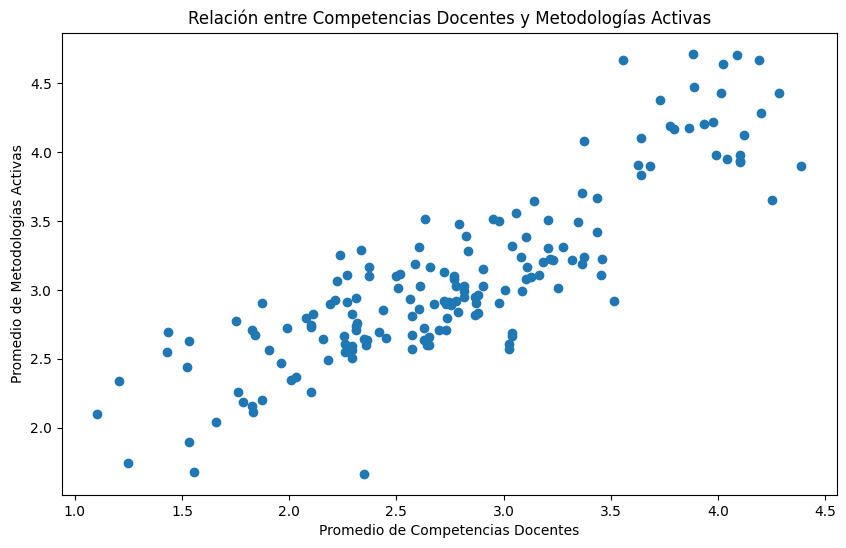

In [17]:
# Calcular promedios por dimensión
def calcular_promedios(df, prefix):
    promedios = {}
    for i in range(1, 4):
        cols = [col for col in df.columns if col.startswith(f'{prefix}_Dim{i}')]
        promedios[f'{prefix}_Dim{i}'] = df[cols].mean(axis=1)
    return pd.DataFrame(promedios)

promedios_competencias = calcular_promedios(df_var1, 'Var1')
promedios_metodologias = calcular_promedios(df_var2, 'Var2')

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(promedios_competencias.mean(axis=1), promedios_metodologias.mean(axis=1))
plt.xlabel('Promedio de Competencias Docentes')
plt.ylabel('Promedio de Metodologías Activas')
plt.title('Relación entre Competencias Docentes y Metodologías Activas')
plt.show()